<a href="https://colab.research.google.com/github/koskath/Projects/blob/main/Patents_in_canada_Rmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PATENTS ANALYSIS IN CANADA

**The purpose of this study is to survey patents in the country of Canada and to draw results and conclusions regarding the renewal of copyright. Innovation and patents are two closely related concepts, since patents ensure that innovators protect their ideas and creations that they will not be copied without permission.**

*The following notebook was created during my university course "Innovation Economics"*


## INSTALL AND IMPORT THE LIBRARIES

In [ ]:
# install.packages("readxl")
# install.packages("writexl")
# install.packages("dplyr")
# install.packages("Hmisc")
# install.packages("lattice")
# install.packages("survival")
# install.packages("Formula")
# install.packages("ggplot2")
# install.packages("corrplot")
# install.packages("reshape2")
# install.packages("GGally")
# install.packages("lmtest")

In [ ]:
library("readxl")
library("writexl")
library("dplyr")
library("reshape2")
library("GGally")
library("lmtest")
library("Hmisc")
library("lattice")
library("survival")
library("Formula")
library("ggplot2")
library("corrplot")

## LOAD THE DATASET

In [4]:
patents <- read_excel("Canada_Patents.xlsx")

*   Appyear: Application Year for patent registration
*   Appnumber: Patent Code
*  Gyear : Official patent registration year
*  Inventors: number of inventors  
*  Nipc: number of ipc of each patent
*  ncpc: the number of CPCs of each patent
*  backcites: the number of patent
*  claims: references to the patent
*  renew: renewal years

In [5]:
patents

patent,appyear,appnumber,gyear,inventors,nipc,ncpc,backcites,claims,renew,cnt
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7459428,2006,11/487947,2008,3,1,44,12,24,2,Canada
7459165,2002,10/495455,2008,6,1,7,6,10,2,Canada
7458303,2007,11/689873,2008,1,6,2,18,9,2,Canada
7461113,2004,10/867140,2008,1,7,5,5,17,3,Canada
7459651,2006,11/342577,2008,4,8,4,7,8,3,Canada
7459316,2003,10/614158,2008,3,7,1,13,18,1,Canada
7459329,2005,11/254774,2008,2,8,3,3,16,3,Canada
7460868,2007,11/833829,2008,4,8,3,1,16,3,Canada
7459205,2003,10/654956,2008,4,3,6,17,22,3,Canada


## PROCESS THE DATA

In [6]:
####### Find out the length from the time of the application until the official date ##
patents$length <- patents$gyear - patents$appyear


#### Find out the longlasting patents #####
#### number 3 means the patent has been renewed after 7.5 years #####
patents$renew12 <- ifelse(patents$renew == 3,1,0)

#### combine the most important columns ####
x <- cbind(patents$inventors, patents$ncpc, patents$backcites, patents$claims, patents$length)

##### Descriptive statistics for the new dataset #####
summary(x)

       V1               V2               V3              V4        
 Min.   : 1.000   Min.   : 1.000   Min.   :  1.0   Min.   :  1.00  
 1st Qu.: 1.000   1st Qu.: 3.000   1st Qu.:  6.0   1st Qu.: 13.00  
 Median : 2.000   Median : 5.000   Median : 11.0   Median : 18.00  
 Mean   : 2.606   Mean   : 6.106   Mean   : 15.8   Mean   : 21.68  
 3rd Qu.: 3.000   3rd Qu.: 7.000   3rd Qu.: 18.0   3rd Qu.: 24.75  
 Max.   :15.000   Max.   :44.000   Max.   :119.0   Max.   :160.00  
       V5        
 Min.   : 0.000  
 1st Qu.: 2.000  
 Median : 3.000  
 Mean   : 3.261  
 3rd Qu.: 4.000  
 Max.   :11.000  

## DESCRIPTIVE STATISTICS

In [8]:
summary(patents$renew)
summary(patents$renew12)
summary(patents$ncpc)
summary(patents$backcites)
summary(patents$claims)
summary(patents$length)
summary(patents$inventors)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   3.000   2.141   3.000   3.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.5423  1.0000  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   5.000   6.106   7.000  44.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     6.0    11.0    15.8    18.0   119.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   13.00   18.00   21.68   24.75  160.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   3.261   4.000  11.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.606   3.000  15.000 

In [9]:
### Standard Deviation ###
sd(patents$ncpc)
sd(patents$backcites)
sd(patents$claims)
sd(patents$length)
sd(patents$renew)
sd(patents$renew12)
sd(patents$inventors)

[1] 5.597248

[1] 16.93146

[1] 18.19257

[1] 1.687163

[1] 1.101846

[1] 0.499975

[1] 1.871616

In [10]:
###### Mean ######
mean(patents$renew)
mean(patents$renew12)
mean(patents$ncpc)
mean(patents$backcites)
mean(patents$claims)
mean(patents$length)
mean(patents$inventors)

[1] 2.140845

[1] 0.5422535

[1] 6.105634

[1] 15.79577

[1] 21.6831

[1] 3.260563

[1] 2.605634

Calculate the mean and standard deviation for each column and insert them in a table

In [11]:
stats <- data.frame(
  Mean = c(
    mean(patents$renew),
    mean(patents$renew12),
    mean(patents$ncpc),
    mean(patents$backcites),
    mean(patents$claims),
    mean(patents$length),
    mean(patents$inventors)
  ),
  SD = c(
    sd(patents$renew),
    sd(patents$renew12),
    sd(patents$ncpc),
    sd(patents$backcites),
    sd(patents$claims),
    sd(patents$length),
    sd(patents$inventors)
  )
)


In [12]:
### Name the rows according to the variables ###
row.names(stats) <- c("renew", "renew12", "ncpc", "backcites", "claims", "length", "inventors")
print(stats)

                Mean        SD
renew      2.1408451  1.101846
renew12    0.5422535  0.499975
ncpc       6.1056338  5.597248
backcites 15.7957746 16.931459
claims    21.6830986 18.192575
length     3.2605634  1.687163
inventors  2.6056338  1.871616


## PLOTS

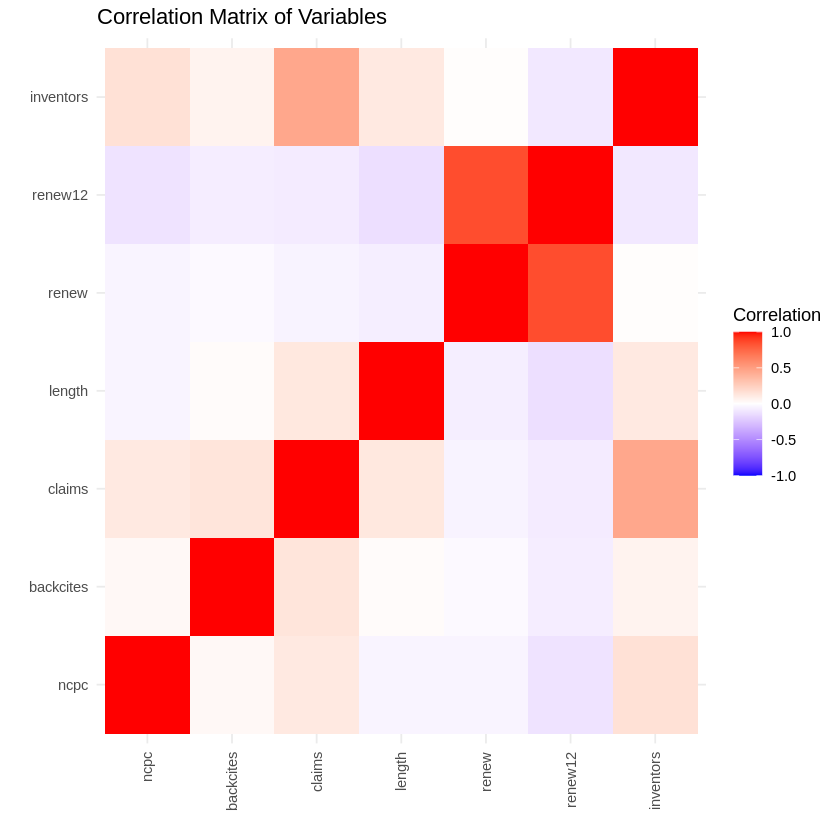

In [13]:
#### CORRELATION PLOT ####
cor_matrix <- cor(patents[, c("ncpc", "backcites", "claims", "length", "renew", "renew12", "inventors")], use="complete.obs")

#### Create the plot using ggplot using ggplot with a heatmap####
cor_matrix_melted <- melt(cor_matrix)

ggplot(data = cor_matrix_melted, aes(x=Var1, y=Var2, fill=value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1), space = "Lab", name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title = "Correlation Matrix of Variables", x = "", y = "")

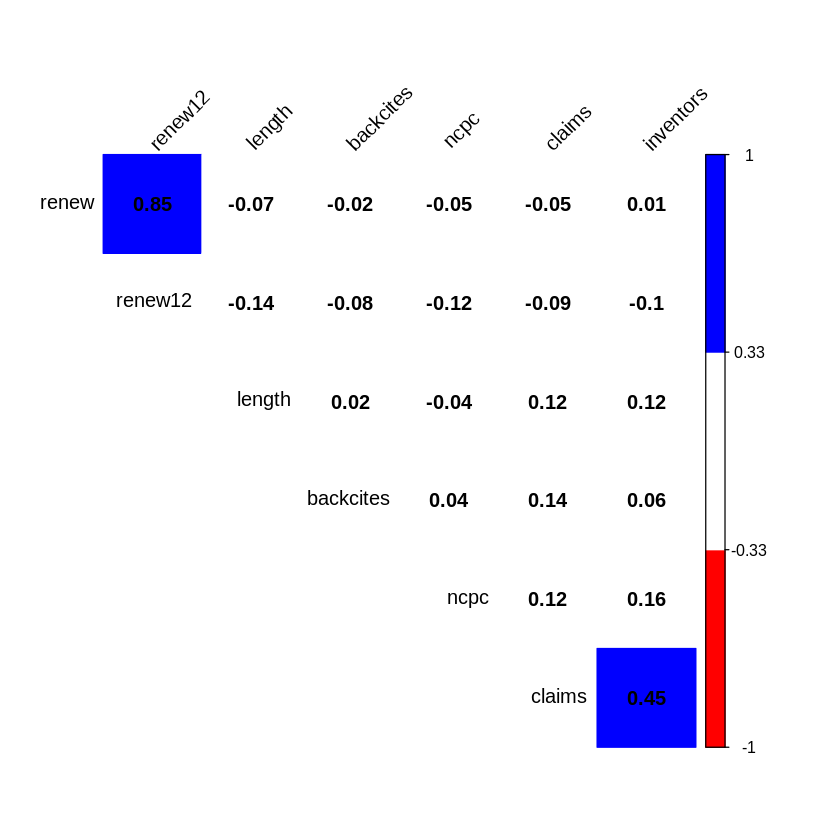

In [14]:
### 2nd way kind of same display ####
corrplot(cor_matrix, method = "color", col = c("#FF0000", "#FFFFFF", "#0000FF"),
         type = "upper", order = "hclust",
         addCoef.col = "black",
         tl.col="black", tl.srt=45,
         diag=FALSE)

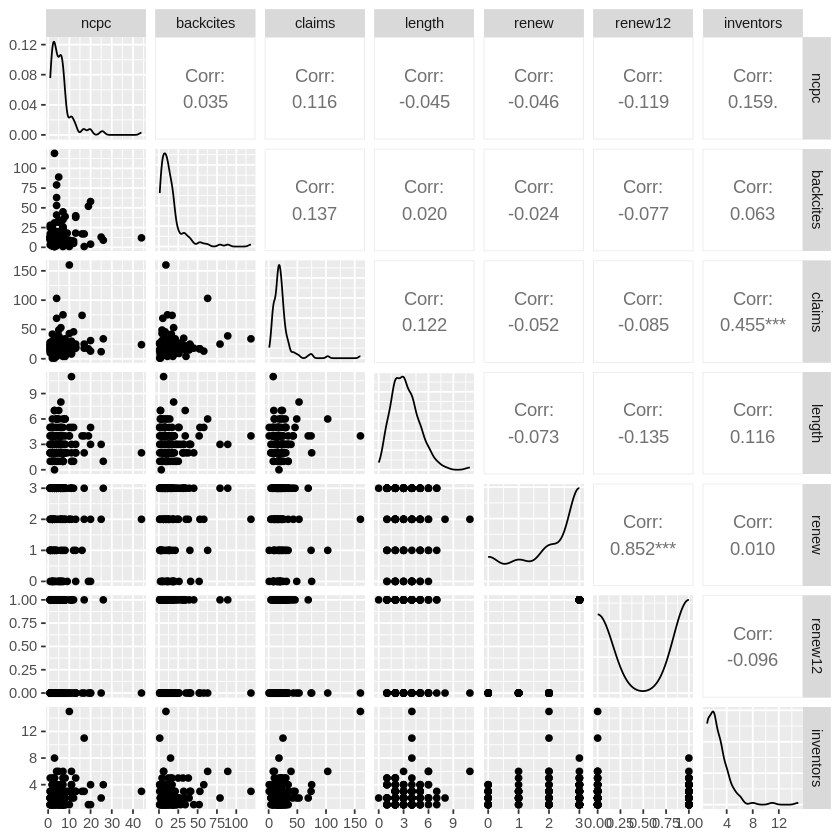

In [15]:
### Main scatterplot using all variables in one display #####
ggpairs(patents[, c("ncpc", "backcites", "claims", "length", "renew", "renew12", "inventors")])

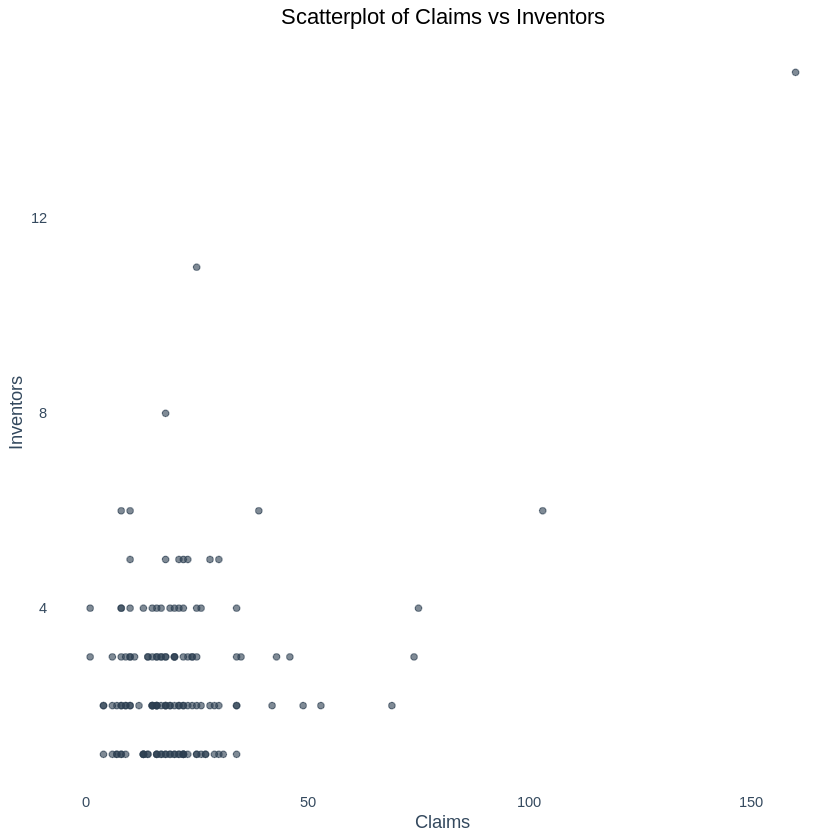

In [16]:
# Separate scatterplot for claims and inventors as they seem to have the greatest correlation ###

variable1 <- patents$claims # Example: Number of non-patent citations
variable2 <- patents$inventors # Example: Number of claims

ggplot(patents, aes(x = variable1, y = variable2)) +
  geom_point(color = "#2C3E50", alpha = 0.6) +
  theme_minimal() + # Use a minimal theme
  theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(color = "#34495E"),
        axis.title = element_text(color = "#34495E"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        legend.position = "none") +
  labs(title = "Scatterplot of Claims vs Inventors",
       x = "Claims",
       y = "Inventors")

In [17]:
# Fitting the multiple linear regression model
model <- lm(claims ~ inventors + ncpc + backcites + renew, data = patents)

# Summary of the model to view coefficients and statistics
summary(model)


Call:
lm(formula = claims ~ inventors + ncpc + backcites + renew, data = patents)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.586  -8.683  -1.819   5.220  85.216 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.73654    3.96258   2.457   0.0153 *  
inventors    4.29661    0.74292   5.783 4.74e-08 ***
ncpc         0.12922    0.24832   0.520   0.6036    
backcites    0.11444    0.08114   1.411   0.1607    
renew       -0.86206    1.24541  -0.692   0.4900    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.27 on 137 degrees of freedom
Multiple R-squared:  0.2229,	Adjusted R-squared:  0.2002 
F-statistic: 9.822 on 4 and 137 DF,  p-value: 5.132e-07


In [18]:
# Additional diagnostics
# Check for homoscedasticity
bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 53.775, df = 4, p-value = 5.865e-11


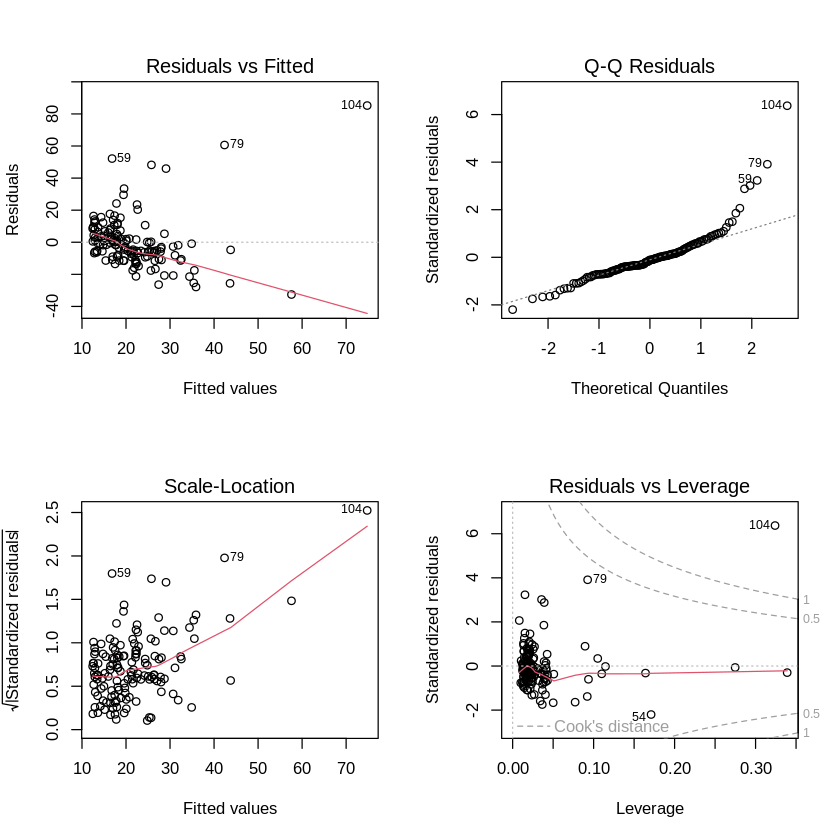

In [19]:
# Plotting diagnostic plots for further analysis
par(mfrow=c(2,2))
plot(model)